In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data Source http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

path = 'C:\\Users\\Peter\\Desktop\\Thinkful\\Thinkful-Lessons\\Thinkful 3.2 Random Forests\\auto-mpg.data'
df = pd.read_table(path, header = None, delim_whitespace=True)

In [3]:
df.columns = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model year',
    'origin',
    'car name'
]

In [4]:
#There are almost as many car names as there are rows so this data isn't very useful.
df['car name'].nunique()

305

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
(df.isnull().sum()/len(df))*100

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model year      0.0
origin          0.0
car name        0.0
dtype: float64

In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

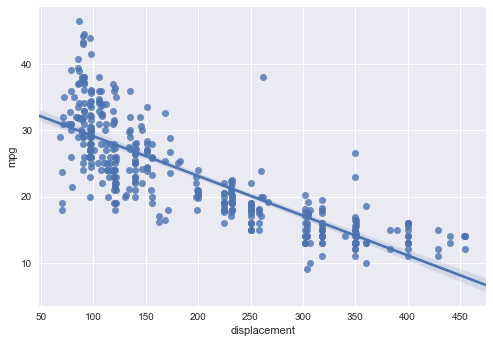

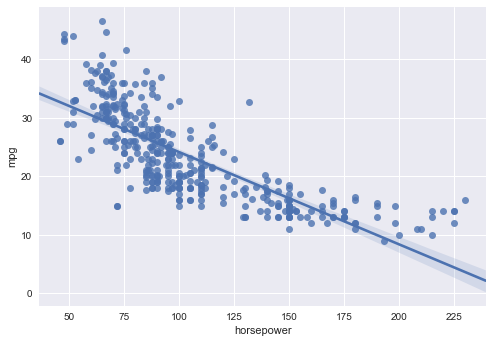

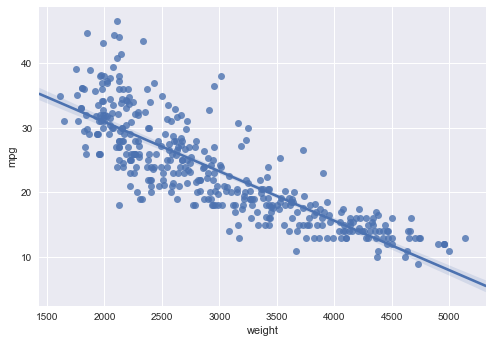

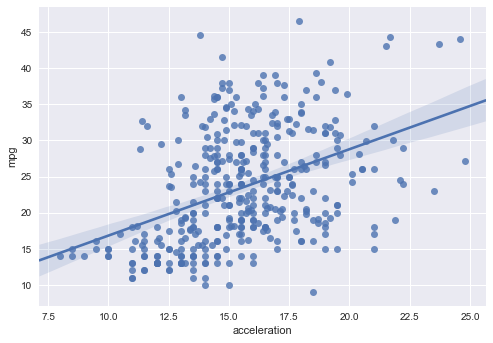

In [9]:
sns.regplot(df['displacement'], df['mpg'])
plt.show()
sns.regplot(df['horsepower'], df['mpg'])
plt.show()
sns.regplot(df['weight'], df['mpg'])
plt.show()
sns.regplot(df['acceleration'], df['mpg'])
plt.show()

In [10]:
from sklearn import linear_model

In [18]:
X = df[['displacement', 'horsepower', 'weight', 'acceleration']]
Y = df['mpg']

regr = linear_model.LinearRegression()
regr.fit(X,Y)
#Y_ = regr.predict(X)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [-0.00600087 -0.04360773 -0.00528051 -0.023148  ]

Intercept: 
 45.2511396993

R-squared:
0.706981186572


In [20]:
from sklearn import neighbors
KNN = neighbors.KNeighborsRegressor(n_neighbors=10, weights = 'distance')
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNN, X, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score

Accuracy: 0.43 (+/- 0.87)


array([ 0.59924935,  0.55297706,  0.27053867,  0.6909638 ,  0.61871272,
        0.84491481,  0.75231215,  0.70914946, -0.62751039, -0.06682435])

In [14]:
from sklearn.preprocessing import normalize
dataforuse = df[['displacement', 'horsepower', 'weight', 'acceleration', 'mpg']]
normeddata = pd.DataFrame(normalize(dataforuse, axis=0))
normeddata.columns = ['normed_displacement', 'normed_horsepower', 'normed_weight', 'normed_acceleration', 'normed_mpg']
normedX = normeddata[['normed_displacement', 'normed_horsepower', 'normed_weight', 'normed_acceleration']]
normedY = normeddata['normed_mpg']

In [15]:
KNN = neighbors.KNeighborsRegressor(n_neighbors=10, weights = 'distance')
score = cross_val_score(KNN, normedX, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.50 (+/- 0.66)


In [ ]:
normeddata.head()